# LendingClub

As data scientists at LendingClub, our primary mission is to streamline and automate lending decisions. Currently, our decision-making process for new customers involves four distinct steps. We begin by evaluating an individual's eligibility for a loan, followed by assigning a grade, sub-grade, and ultimately determining an appropriate interest rate.

Our objective is to explore the feasibility of independently predicting all four of these targets in real-time. To achieve this, we will create four separate models and leverage their predictive outcomes to make well-informed decisions regarding which aspects of the lending process can be automated. We believe that a model can be considered successful if its F1 score reaches 0.7 or higher.

Furthermore, our intention is to provide valuable insights that can inform the development of a more comprehensive automation strategy for our lending processes.

In [2]:
# %load_ext lab_black


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myFunc
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)


c:\Users\jonyt\anaconda3\envs\conda_ds_39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pd.set_option("float_format", "{:.1f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)


# Cleaning accepted_loan_df categorical features

In [5]:
accepted_loan_df = pd.read_csv("accepted_2007_to_2018Q4.csv")

C:\Users\jonyt\AppData\Local\Temp\ipykernel_1108\2101185493.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_loan_df = pd.read_csv("accepted_2007_to_2018Q4.csv", skiprows=lambda i: i % 2)


In [6]:
accepted_loan_df.head(2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68355089,NaN,24700.0,24700.0,24700.0,36 months,12.0,820.3,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.1,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.7,25679.7,24700.0,979.7,0.0,0.0,0.0,Jun-2016,926.4,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.8,829.9,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.1,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.6,15897.6,31464.0,31464.0,19102.3,12361.7,0.0,0.0,0.0,Feb-2019,829.9,Apr-2019,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,Na

Our dataset of accepted loans have more then 2 millions rows and 151 columns.  
 - Explanation of data fields is provided below.

In [10]:
data_fields_df = pd.read_excel("data fields.xlsx")
data_fields_df.sample(5)


,field,description
64,open_acc,The number of open credit lines in the borrowe...
14,earliest_cr_line,The date the borrower's earliest reported cred...
92,total_rec_prncp,Principal received to date
27,int_rate,Interest Rate on the loan
15,emp_length,Employment length in years. Possible values ar...


- Checking for duplicates

In [11]:
accepted_loan_df.id.duplicated().sum()


0

No duplicates were found.

- Missing values

At this point I will not drop or impute any missing values.

In [12]:
accepted_loan_df.isnull().sum()


id                             0
member_id                1130350
loan_amnt                     17
funded_amnt                   17
funded_amnt_inv               17
                          ...   
settlement_status        1113289
settlement_date          1113289
settlement_amount        1113289
settlement_percentage    1113289
settlement_term          1113289
Length: 151, dtype: int64

# Data transformation

- Categorical features

In [13]:
object_cols = accepted_loan_df.select_dtypes(include=object)


In [18]:
df_categoricals_count = accepted_loan_df.select_dtypes(include=object).nunique()
df_categoricals_count.sort_values(ascending=False)


id                           1130350
url                          1130333
emp_title                     299948
desc                           62480
title                          35000
zip_code                         939
earliest_cr_line                 727
sec_app_earliest_cr_line         628
last_credit_pull_d               139
issue_d                          139
last_pymnt_d                     136
next_pymnt_d                      96
settlement_date                   87
debt_settlement_flag_date         79
addr_state                        51
sub_grade                         35
hardship_end_date                 28
payment_plan_start_date           27
hardship_start_date               27
purpose                           14
emp_length                        11
loan_status                        9
hardship_reason                    9
grade                              7
home_ownership                     6
hardship_loan_status               5
verification_status_joint          3
h

Let's frop features, wich are not important for EDA and for model.

In [19]:
accepted_loan_df = accepted_loan_df.drop(
    ["id", "member_id", "url", "emp_title", "desc", "title", "zip_code", "purpose"],
    axis=1,
)


To make "term" a numeric feature, we just need to get rid  of word " months". Let's do that.

In [20]:
accepted_loan_df["term"] = (
    accepted_loan_df["term"].str.replace(" months", "").astype(float)
)


The format of date is difficult to interpret, esspacially in modeling part. So let's seperate year and month columns as numeric features.

In [22]:
def date_split_to_Y_M(column1):
    accepted_loan_df[f"Month {column1}"] = accepted_loan_df[column1].str[:3]
    accepted_loan_df[f"Year {column1}"] = (
        accepted_loan_df[column1].str[4:8].astype(float)
    )
    accepted_loan_df[f"Month {column1}"] = accepted_loan_df[f"Month {column1}"].replace(
        {
            "Jan": 1,
            "Feb": 2,
            "Mar": 3,
            "Apr": 4,
            "May": 5,
            "Jun": 6,
            "Jul": 7,
            "Aug": 8,
            "Sep": 9,
            "Oct": 10,
            "Nov": 11,
            "Dec": 12,
        }
    )
    return accepted_loan_df


In [23]:
date_split_to_Y_M("issue_d").head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Month issue_d,Year issue_d
0,24700.0,24700.0,24700.0,36.0,12.0,820.3,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,SD,16.1,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.7,25679.7,24700.0,979.7,0.0,0.0,0.0,Jun-2016,926.4,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2015.0
1,35000.0,35000.0,35000.0,60.0,14.8,829.9,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,NJ,17.1,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.6,15897.6,31464.0,31464.0,19102.3,12361.7,0.0,0.0,0.0,Feb-2019,829.9,Apr-2019,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2015.0
2,11950.0,11950.0,11950.0,36.0,13.4,405.2,C,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,GA,10.2,0.0,Oc

After the splitiing years and months, original date columns are not needed any more. Let's drop them.

In [24]:
accepted_loan_df = accepted_loan_df.drop(
    [
        "earliest_cr_line",
        "sec_app_earliest_cr_line",
        "last_credit_pull_d",
        "issue_d",
        "last_pymnt_d",
        "next_pymnt_d",
        "settlement_date",
        "debt_settlement_flag_date",
        "hardship_end_date",
        "payment_plan_start_date",
        "hardship_start_date",
    ],
    axis=1,
)


Employment length could be also transformed into numeric feature:

In [25]:
accepted_loan_df["emp_length"] = (
    accepted_loan_df["emp_length"]
    .replace(
        {
            "< 1 year": "0",
            "1 year": "1",
            "2 years": "2",
            "3 years": "3",
            "4 years": "4",
            "5 years": "5",
            "6 years": "6",
            "7 years": "7",
            "8 years": "8",
            "9 years": "9",
            "10+ years": "10",
        }
    )
    .astype(float)
)


Let's examine the unique values within our categorical features. This exploration may reveal potential candidates for transformation into numeric variables, or perhaps we'll uncover some unusual or unexpected values

In [27]:
col_lst = object_cols.columns.to_list()

for col in col_lst:
    print(object_cols[col].unique())


['C' 'B' 'E' 'A' 'D' 'F' 'G' nan]
['C1' 'C5' 'C3' 'B1' 'B5' 'C2' 'E2' 'A4' 'E3' 'D4' 'A1' 'F3' 'C4' 'B3'
 'D3' 'A5' 'A2' 'B4' 'E4' 'D2' 'D1' 'B2' 'F1' 'D5' 'E5' 'A3' 'E1' 'G1'
 'F2' 'F5' 'G3' 'G2' 'F4' 'G4' 'G5' nan]
['MORTGAGE' 'RENT' 'OWN' 'ANY' nan 'NONE' 'OTHER']
['Not Verified' 'Source Verified' 'Verified' nan]
['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' nan 'Default'
 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid']
['n' 'y' nan]
['SD' 'NJ' 'GA' 'SC' 'RI' 'TX' 'CA' 'AZ' 'IN' 'MD' 'KS' 'NM' 'VA' 'NY'
 'LA' 'IL' 'CO' 'WA' 'MI' 'FL' 'TN' 'DC' 'OH' 'AL' 'HI' 'DE' 'MA' 'NH'
 'NC' 'OR' 'MN' 'CT' 'AR' 'NV' 'WV' 'PA' 'WY' 'MO' 'WI' 'KY' 'MS' 'NE'
 'OK' 'UT' 'MT' 'ME' 'AK' 'VT' 'ND' nan 'ID' 'IA']
['w' 'f' nan]
['Individual' 'Joint App' nan]
[nan 'Not Verified' 'Verified' 'Source Verified']
['N' 'Y' nan]
[nan 'INTEREST ONLY-3 MONTHS DEFERRAL']
[nan 'DIVORCE' 'NATURAL_DISASTER'

It looks good, so we have finished transformig categorical features. The categorical data looks correct. For now I will leave Nans as it is.

# Cleaning/transforming numerical features

## Missing values

At this point I will not drop any missing values. In modeling part I will impute it with -9999.

In [28]:
accepted_loan_df.isnull().sum()


loan_amnt                                          17
funded_amnt                                        17
funded_amnt_inv                                    17
term                                               17
int_rate                                           17
installment                                        17
grade                                              17
sub_grade                                          17
emp_length                                      73764
home_ownership                                     17
annual_inc                                         19
verification_status                                17
loan_status                                        17
pymnt_plan                                         17
addr_state                                         17
dti                                               863
delinq_2yrs                                        31
fico_range_low                                     17
fico_range_high             

# Data transformations

Let's calculate Risk score using  "fico_range_low" and 	"fico_range_high" as mean of thease two featureres.

In [29]:
accepted_loan_df["Risk_Score"] = (
    accepted_loan_df["fico_range_low"] + accepted_loan_df["fico_range_high"]
) / 2


In [30]:
accepted_loan_df = accepted_loan_df.drop(["fico_range_low", "fico_range_high"], axis=1)


# Outliers

In [31]:
accepted_loan_df.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,Month issue_d,Year issue_d,Risk_Score
count,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1056586.0,1130331.0,1129487.0,1130319.0,1130318.0,550789.0,179672.0,1130319.0,1130319.0,1130333.0,1129472.0,1130319.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130333.0,1130262.0,290051.0,1130333.0,60505.0,60504.0,1130319.0,1095194.0,1095194.0,697262.0,697263.0,697263.0,697263.0,675103.0,697263.0,595199.0,697263.0,697263.0,697263.0,697141.0,1095194.0,697263.0,697262.0,697262.0,1105318.0,1095150.0,1092849.0,1092257.0,1130262.0,1130319.0,1060634.0,1095194.0,1095194.0,1095194.0,1105318.0,1093594.0,259409.0,982380.0,369967.0,1095194.0,1095194.0,1095194.0,1101032.0,1095194.0,1095194.0,1095194.0,1095193.0,1095194.0,1101032.0,1053561.0,1095194.0,1095194.0,1095194.0,1095126.0,1092625.0,1129652.0,1130283.0,1095194.0,1105318.0,1105318.0,1095194.0,54122.0,54122.0,54122.0,54122.0,54122.0,54122.0,53222.0,54122.0,54122.0,54122.0,54122.0,17999.0,5426.0,5426.0,5426.0,5426.0,4260.0,5426.0,5426.0,17061.0,17061.0,17061.0,1130333.0,1130333.0,1130333.0
mean,15040.8,15035.5,15017.1,42.9,13.1,445.6,5.9,77971.4,18.8,0.3,0.6,34.6,72.3,11.6,0.2,16671.5,50.3,24.2,4202.5,4201.5,12080.5,12062.2,9506.2,2429.3,1.5,143.5,23.9,3432.6,687.7,675.6,0.0,44.2,1.0,123288.8,19.2,0.0,240.9,142502.0,0.9,2.8,0.7,1.6,21.3,35475.7,69.2,1.3,2.8,5798.1,57.0,34599.0,1.0,1.5,2.0,4.5,13553.5,11406.8,57.9,0.0,11.0,125.7,181.5,14.0,8.3,1.6,24.8,39.3,7.0,35.8,0.5,3.7,5.6,4.8,7.7,8.4,8.2,14.0,5.6,11.6,0.0,0.0,0.1,2.1,94.1,42.4,0.1,0.0,178241.2,51012.9,23202.2,43695.1,33568.2,669.8,673.8,0.6,1.5,11.5,58.0,3.0,12.5,0.0,0.1,36.9,3.0,157.7,3.0,13.9,461.7,11761.6,194.1,5017.1,47.8,13.2,6.8,2015.9,700.6
std,9187.7,9186.0,9190.0,10.9,4.8,267.1,3.7,78250.0,14.2,0.9,0.9,21.9,26.5,5.6,0.6,23149.8,24.7,12.0,7340.3,7339.4,9901.3,9896.9,8321.9,2677.6,11.7,744.3,130.5,6021.0,72.9,111.1,0.2,21.5,0.0,69492.1,7.8,0.1,11868.1,161070.9,1.1,3.0,0.9,1.6,26.1,44142.1,23.7,1.5,2.6,5488.7,20.9,37401.7,1.5,2.7,2.4,3.2,16495.4,16617.7,28.6,0.1,683.5,53.3,97.2,17.5,9.2,1.9,32.3,22.6,6.0,22.3,1.3,2.3,3.4,3.0,4.7,7.3,4.7,8.0

FICO Score Ranges
The overall FICO score range is between 300 and 850. In general, scores in the 670 to 739 range indicate a “good” credit history and most lenders will consider this score favorable. In contrast, borrowers in the 580 to 669 range may find it difficult to get financing at attractive rates. (https://www.investopedia.com/terms/f/ficoscore.asp).  
We may see, that fico scores are correct.

In [32]:
numeric_cols = accepted_loan_df.select_dtypes(include=np.number)


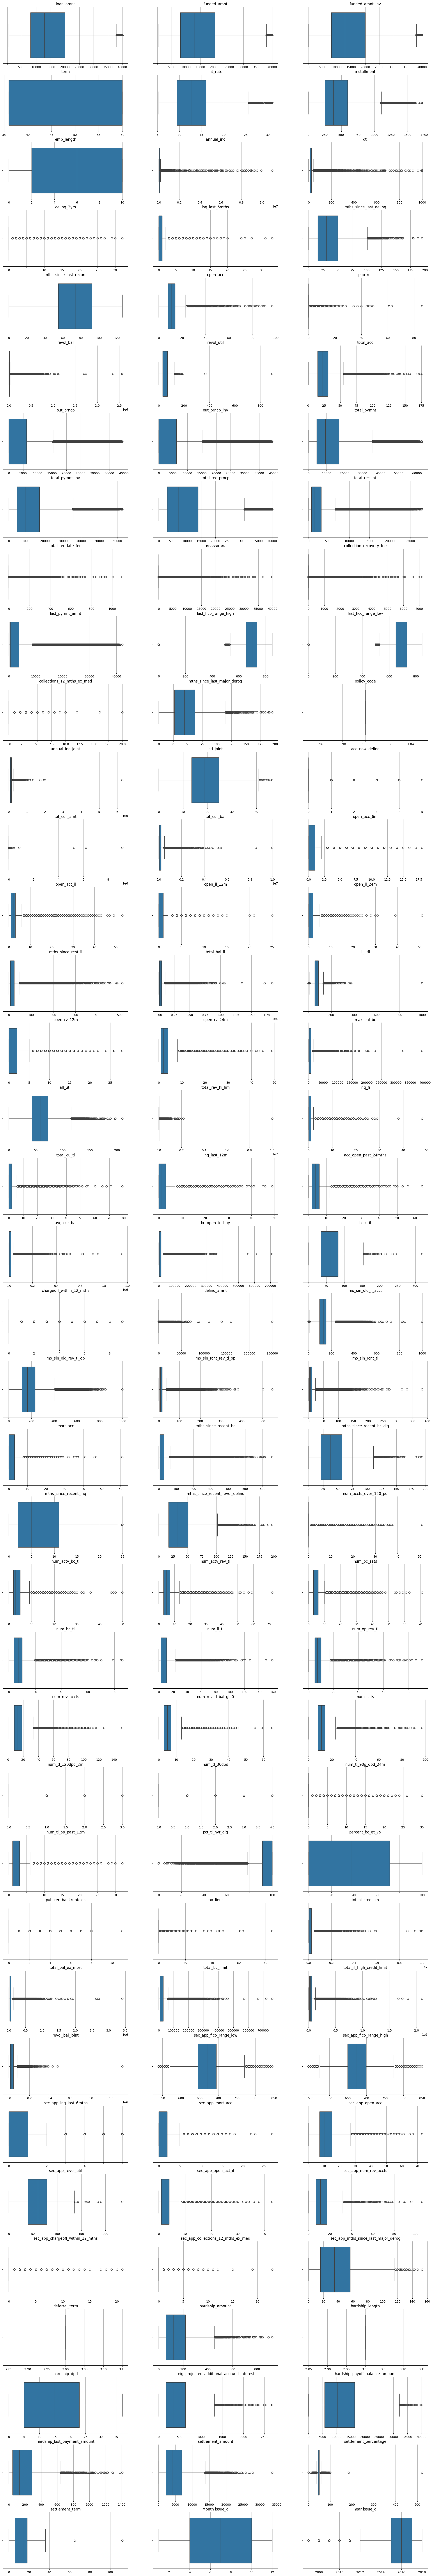

In [33]:
plt.figure(figsize=(25, 200))
for i in range(1, len(numeric_cols.columns)):
    plt.subplot(50, 3, i)
    outlier = sns.boxplot(x=numeric_cols.columns[i - 1], data=numeric_cols)
    outlier.xaxis.grid(True)
    outlier.set(xlabel="")
    outlier.set_title(f"{numeric_cols.columns[i-1]}")
    sns.despine(right=True, left=True)
plt.show()


All numeric features looks reasonable, so I assume that we have no outliers in our dataset and our numeric features looks good.

In [ ]:
accepted_loan_df.to_csv("final_cleaned_accepted_loan_df.csv")
